#*CNN*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocess

- 1st tokenizer

In [3]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize



nltk.data.path.append(r"/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main")  # Replace with your actual NLTK data path
# Load your data from CSV file
file_path ="/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_train.csv"
train_data = pd.read_csv(file_path)

test_file_path ="/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_test.csv"
test_data = pd.read_csv(test_file_path)


# # Download NLTK resources (if not already downloaded)
# nltk.download('punkt')
# nltk.download('stopwords')

# # Define your preprocessing function
# def preprocess_and_get_length(text):
#     # Convert to lowercase
#     text = text.lower()

#     # Remove punctuation and numbers
#     text = re.sub(r'[^a-z\s]', '', text)
#     # text = re.sub(r'[^a-z0-9\s]', '', text)


#     # Tokenization
#     tokens = word_tokenize(text)

#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     tokens = [token for token in tokens if token not in stop_words]

#     # Return the length of the processed text
#     return tokens

# # Apply the preprocessing and get the length for each text
# tokenized_data = train_data['medical_abstract'].apply(preprocess_and_get_length)
# tokenized_data_test = test_data['medical_abstract'].apply(preprocess_and_get_length)

# # Find the maximum length
# max_length = max(tokenized_data.apply(lambda x: len(x)))
# print("The length of the longest text after preprocessing:", max_length)


In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Define your preprocessing function
def preprocess_and_get_length(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    processed_tokens = []
    for token in tokens:
        if re.match(r'^\d+(\.\d+)?$', token):
            processed_tokens.append(float(token))  # Convert to float if it's a float
        elif token not in stop_words and not re.match(r'^\W+$', token):
            processed_tokens.append(token.lower())

    # Return the length of the processed text
    return processed_tokens

# Apply the preprocessing and get the length for each text
tokenized_data = train_data['medical_abstract'].apply(preprocess_and_get_length)
tokenized_data_test = test_data['medical_abstract'].apply(preprocess_and_get_length)

# Convert tokenized data to strings
tokenized_texts = tokenized_data.apply(lambda x: ' '.join(map(str, x)))
tokenized_texts_test = tokenized_data_test.apply(lambda x: ' '.join(map(str, x)))

# Create a tokenizer and fit on tokenized_data without numbers
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(tokenized_texts)

# Convert tokenized data to sequences without further processing
sequences_train = []
for text in tokenized_texts:
    seq = []
    for token in text.split():
        if token in tokenizer.word_index:
            seq.append(tokenizer.word_index[token])
        else:
            try:
                seq.append(int(token))  # Try converting to int
            except ValueError:
                try:
                    seq.append(float(token))  # Try converting to float
                except ValueError:
                    seq.append(tokenizer.word_index['<OOV>'])  # If not a number, use OOV token
    sequences_train.append(seq)

sequences_test = []
for text in tokenized_texts_test:
    seq = []
    for token in text.split():
        if token in tokenizer.word_index:
            seq.append(tokenizer.word_index[token])
        else:
            try:
                seq.append(int(token))  # Try converting to int
            except ValueError:
                try:
                    seq.append(float(token))  # Try converting to float
                except ValueError:
                    seq.append(tokenizer.word_index['<OOV>'])  # If not a number, use OOV token
    sequences_test.append(seq)

# Pad sequences to ensure consistent length for input to the CNN
max_length = max(max(len(seq) for seq in sequences_train), max(len(seq) for seq in sequences_test))
padded_train = pad_sequences(sequences_train, maxlen=max_length, padding='post', truncating='post', value=0)
padded_test = pad_sequences(sequences_test, maxlen=max_length, padding='post', truncating='post', value=0)


In [41]:
max_length

423

In [ ]:
train_data['medical_abstract'][4]

In [47]:
sequences_train[4]

[399,
 1214,
 1544,
 46,
 38,
 344,
 1,
 1,
 1,
 1176,
 399,
 1214,
 3657,
 344,
 471,
 399,
 2186,
 4595,
 3610,
 1465,
 871,
 1767,
 201,
 193,
 1,
 1,
 1,
 1236,
 1,
 594,
 437,
 503,
 507.0,
 3,
 427,
 566.0,
 399,
 1,
 716,
 4032,
 1,
 868,
 455,
 1802,
 422,
 242,
 120,
 3.0,
 1,
 1,
 1,
 1,
 12.0,
 1,
 7915,
 3255,
 484.0,
 393,
 1,
 4033,
 1307,
 393,
 1002,
 137,
 533,
 163,
 1,
 33,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 240,
 8.0,
 1,
 149,
 1,
 1214,
 1,
 910,
 1,
 696,
 3,
 1,
 1,
 377,
 2741,
 1345,
 10.0,
 22,
 285,
 39,
 62,
 377,
 6420,
 155,
 1214,
 1,
 1,
 249,
 55,
 6,
 629,
 3,
 1,
 160,
 300,
 4318,
 1619,
 1,
 78,
 249,
 1,
 2257,
 3,
 1,
 1214,
 662,
 1453,
 249,
 228,
 55,
 62,
 6,
 1,
 3285,
 11,
 1,
 1,
 313,
 3,
 399,
 1214,
 6,
 629,
 3,
 33,
 163,
 1151,
 344,
 1,
 1,
 104,
 1]

In [ ]:
tokenized_data[4]

In [ ]:
tokenized_data_test

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Define the maximum length
max_length = max_length

# Create a tokenizer and fit on tokenized_data
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(tokenized_data)

# Convert tokenized data to sequences
sequences_train = tokenizer.texts_to_sequences(tokenized_data)
sequences_test = tokenizer.texts_to_sequences(tokenized_data_test)

# Pad sequences to ensure consistent length for input to the CNN
padded_train = pad_sequences(sequences_train, maxlen=max_length, padding='post', truncating='post', value=0)
padded_test = pad_sequences(sequences_test, maxlen=max_length, padding='post', truncating='post', value=0)


In [65]:
max_length

460

In [ ]:
sequences_test[3]

In [ ]:
sequences_train[4]

In [ ]:
padded_train[4]

In [75]:
maxx=1
for a in sequences_train:
 if maxx < len(a):
  maxx=len(a)
print(maxx)

403


In [ ]:
sequences_train[4]

In [7]:
num_classes=5
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Assuming 'conditional_label' is the column containing your categorical labels
labels = train_data['condition_label']

# Step 1: Convert labels to numerical indices using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Step 2: Convert numerical indices to one-hot encoded vectors
labels_train_one_hot = tf.keras.utils.to_categorical(labels_encoded)

labels_test = test_data['condition_label']

# Step 1: Convert labels to numerical indices using LabelEncoder
label_encoder_test = LabelEncoder()
labels_encoded_test = label_encoder.fit_transform(labels_test)

# Step 2: Convert numerical indices to one-hot encoded vectors
labels_test_one_hot = tf.keras.utils.to_categorical(labels_encoded_test)

# Now, labels_one_hot contains the one-hot encoded representations of your labels


In [8]:
# Assuming train_data is your DataFrame
labels = train_data['condition_label'].tolist()

# Subtract 1 from each element in the list
labels_minus_one = [label - 1 for label in labels]


In [9]:
# Assuming train_data is your DataFrame
labels_test = test_data['condition_label'].tolist()

# Subtract 1 from each element in the list
labels_minus_one_test = [label - 1 for label in labels_test]


## CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam

# Define the CNN model
embedding_dim = 50
filters = 128

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=filters, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))  # Assuming you've defined num_classes

# Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the optimizer with a custom learning rate
custom_optimizer = Adam(learning_rate=0.0001)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(padded_train, labels_train_one_hot, epochs=100, batch_size=64, validation_data=(padded_test, labels_test_one_hot))
# filters       = 64
# lr            = 0.001
# epochs       = 10
# batch size   = 32
# best val acc = 54
# final loss   = 0.36


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on test data
predictions = model.predict(padded_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test_one_hot, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels)
print("\nClassification Report:")
print(class_report)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 365, 50)           2026750   
                                                                 
 conv1d (Conv1D)             (None, 363, 128)          19328     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 2063235 (7.87 MB)
Trainable params: 2063235 (7.87 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

KeyboardInterrupt: 

## CNN , Early stopping

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Define the CNN model
embedding_dim = 50
filters = 128

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=filters, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
custom_optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
model.fit(
    padded_train,
    labels_train_one_hot,
    epochs=100,
    batch_size=64,
    validation_data=(padded_test, labels_test_one_hot),
    callbacks=[early_stopping]
)

# Evaluate the model on test data
predictions = model.predict(padded_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test_one_hot, axis=1)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Epoch 1/100
181/181 [==============================] - 22s 115ms/step - loss: 1.5546 - accuracy: 0.3267 - val_loss: 1.5297 - val_accuracy: 0.3328
Epoch 2/100
181/181 [==============================] - 23s 129ms/step - loss: 1.5186 - accuracy: 0.3328 - val_loss: 1.5133 - val_accuracy: 0.3328
Epoch 3/100
181/181 [==============================] - 22s 122ms/step - loss: 1.4721 - accuracy: 0.3417 - val_loss: 1.4315 - val_accuracy: 0.4048
Epoch 4/100
181/181 [==============================] - 23s 129ms/step - loss: 1.3202 - accuracy: 0.5034 - val_loss: 1.2639 - val_accuracy: 0.5035
Epoch 5/100
181/181 [==============================] - 21s 118ms/step - loss: 1.1734 - accuracy: 0.5403 - val_loss: 1.1884 - val_accuracy: 0.5121
Epoch 6/100
181/181 [==============================] - 21s 116ms/step - loss: 1.0951 - accuracy: 0.5558 - val_loss: 1.1528 - val_accuracy: 0.5229
Epoch 7/100
181/181 [==============================] - 24s 131ms/step - loss: 1.0344 - accuracy: 0.5757 - val_loss: 1.1220 -

- Run again

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Define the CNN model
embedding_dim = 50
filters = 128

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=filters, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
custom_optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
model.fit(
    padded_train,
    labels_train_one_hot,
    epochs=100,
    batch_size=64,
    validation_data=(padded_test, labels_test_one_hot),
    callbacks=[early_stopping]
)

# Evaluate the model on test data
predictions = model.predict(padded_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test_one_hot, axis=1)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Epoch 1/100
181/181 [==============================] - 24s 125ms/step - loss: 1.5508 - accuracy: 0.3261 - val_loss: 1.5270 - val_accuracy: 0.3328
Epoch 2/100
181/181 [==============================] - 20s 109ms/step - loss: 1.5142 - accuracy: 0.3328 - val_loss: 1.5054 - val_accuracy: 0.3328
Epoch 3/100
181/181 [==============================] - 20s 112ms/step - loss: 1.4537 - accuracy: 0.3630 - val_loss: 1.4011 - val_accuracy: 0.4349
Epoch 4/100
181/181 [==============================] - 23s 129ms/step - loss: 1.2890 - accuracy: 0.5070 - val_loss: 1.2436 - val_accuracy: 0.5031
Epoch 5/100
181/181 [==============================] - 20s 113ms/step - loss: 1.1631 - accuracy: 0.5397 - val_loss: 1.1841 - val_accuracy: 0.5121
Epoch 6/100
181/181 [==============================] - 20s 112ms/step - loss: 1.0959 - accuracy: 0.5603 - val_loss: 1.1530 - val_accuracy: 0.5190
Epoch 7/100
181/181 [==============================] - 23s 127ms/step - loss: 1.0439 - accuracy: 0.5739 - val_loss: 1.1321 -

## add class weight

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

# Calculate class weights

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(labels_minus_one),
                                        y = labels_minus_one
                                    )
class_weights_dict = dict(enumerate(class_weights))


print(f'class_weights_dict : {class_weights_dict}')


# Define the CNN model
embedding_dim = 50
filters = 128

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=filters, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model with class weights
custom_optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True) #5

# Train the model with early stopping and class weights
model.fit(
    padded_train,
    labels_train_one_hot,
    epochs=100,
    batch_size=64,
    validation_data=(padded_test, labels_test_one_hot),
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)

# Evaluate the model on test data
predictions = model.predict(padded_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test_one_hot, axis=1)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)



class_weights_dict : {0: 0.9130434782608695, 1: 1.9330543933054394, 2: 1.5, 3: 0.9463334698893896, 4: 0.600936524453694}
Epoch 1/100
144/181 [======================>.......] - ETA: 4s - loss: 1.6052 - accuracy: 0.2752

KeyboardInterrupt: 

In [ ]:

# F1
from sklearn.metrics import f1_score

# Calculate F1 micro score
f1_micro = f1_score(true_labels, predicted_labels, average='micro')

print("F1 Micro Score:", f1_micro)


F1 Micro Score: 0.5983379501385041


<Figure size 500x300 with 0 Axes>

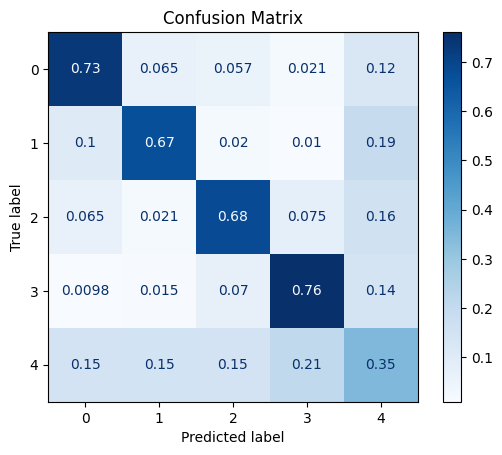

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Assuming 'model' is a Keras model
# Assuming 'true_labels' and 'predicted_labels' are available

# Calculate the confusion matrix

# Normalize each row to convert counts to percentages
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(5, 3))
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Assuming 'model' is your Keras CNN model
model.save("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/MedicalTextClassification.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/MedicalTextClassification.h5")


## Change Kernel Size to 5

In [115]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize



nltk.data.path.append(r"/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main")  # Replace with your actual NLTK data path
# Load your data from CSV file
file_path ="/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_train.csv"
train_data = pd.read_csv(file_path)

test_file_path ="/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_test.csv"
test_data = pd.read_csv(test_file_path)

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
# tokenizer
# Define your preprocessing function
def preprocess_and_get_length(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization
    # tokens = re.split(r' |-|\(|\)', text)  # Split by space, hyphen, parentheses
    tokens = re.findall(r'\b(?:\w+(?:[.-]\w+)*|[^\w\s])', text)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    processed_tokens = []
    for token in tokens:
        if re.match(r'^\d+(\.\d+)?$', token):
            processed_tokens.append(float(token))  # Convert to float if it's a float
        elif token not in stop_words and not re.match(r'^\W+$', token):
            processed_tokens.append(token.lower())

    # Return the length of the processed text
    return processed_tokens

# Apply the preprocessing and get the length for each text
tokenized_data = train_data['medical_abstract'].apply(preprocess_and_get_length)
tokenized_data_test = test_data['medical_abstract'].apply(preprocess_and_get_length)

# Convert tokenized data to strings
tokenized_texts = tokenized_data.apply(lambda x: ' '.join(map(str, x)))
tokenized_texts_test = tokenized_data_test.apply(lambda x: ' '.join(map(str, x)))

# Create a tokenizer and fit on tokenized_data without numbers
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(tokenized_texts)

# Convert tokenized data to sequences without further processing
sequences_train = []
for text in tokenized_texts:
    seq = []
    for token in text.split():
        if token in tokenizer.word_index:
            seq.append(tokenizer.word_index[token])
        else:
            try:
                seq.append(float(token))  # Try converting to int
            except ValueError:
                seq.append(tokenizer.word_index['<OOV>'])  # If not a number, use OOV token
    sequences_train.append(seq)

sequences_test = []
for text in tokenized_texts_test:
    seq = []
    for token in text.split():
        if token in tokenizer.word_index:
            seq.append(tokenizer.word_index[token])
        else:
            try:
                seq.append(float(token))  # Try converting to int
            except ValueError:
                seq.append(tokenizer.word_index['<OOV>'])  # If not a number, use OOV token
    sequences_test.append(seq)

# Pad sequences to ensure consistent length for input to the CNN
max_length = max(max(len(seq) for seq in sequences_train), max(len(seq) for seq in sequences_test))
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define a custom padding function
import tensorflow as tf

def custom_pad_sequences(sequences, maxlen=None, padding='pre', truncating='pre', value=0.):
    # Pad sequences with float value
    # padded_seqs = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen, padding=padding, truncating=truncating, value=value)

    # Convert the padded sequences to TensorFlow tensors
    seqs_tensors = [tf.convert_to_tensor(seq, dtype=tf.float32) for seq in sequences]
    seqs_tensors2=[]
    # Pad the list of tensors with zeros if needed
    for par in seqs_tensors:
      num_padding = 450 - len(par)
      # print(par)
      if num_padding > 0:
        seqs_tensors2.append( tf.concat([par , [tf.constant(0.0, dtype=tf.float32)] * num_padding], axis=0))
      else:
        print(len(par))

    # Concatenate the tensors along the first dimension
    # padded_seqs_tensor = tf.convert_to_tensor(seqs_tensors)

    return seqs_tensors2

# Usage
padded_train = custom_pad_sequences(sequences_train, maxlen=max_length, padding='post', truncating='post', value=0.)
padded_test = custom_pad_sequences(sequences_test, maxlen=max_length, padding='post', truncating='post', value=0.)
padded_test=np.array(padded_test)
padded_train=np.array(padded_train)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
seqs_tensors4 = [tf.convert_to_tensor(seq, dtype=tf.float32) for seq in sequences_train]


In [117]:
len(seqs_tensors4[4]) #Okkkk

152

In [118]:
padded_train[4]

array([3.990e+02, 1.208e+03, 1.540e+03, 4.600e+01, 3.800e+01, 3.450e+02,
       1.110e+02, 2.500e+02, 1.830e+02, 1.172e+03, 3.990e+02, 1.208e+03,
       3.644e+03, 3.450e+02, 4.690e+02, 3.990e+02, 2.180e+03, 4.568e+03,
       3.596e+03, 1.459e+03, 8.680e+02, 1.763e+03, 2.020e+02, 1.940e+02,
       1.110e+02, 2.500e+02, 1.830e+02, 1.231e+03, 3.596e+03, 5.920e+02,
       4.370e+02, 5.010e+02, 5.070e+02, 3.000e+00, 4.270e+02, 5.660e+02,
       3.990e+02, 5.311e+03, 7.130e+02, 4.018e+03, 1.999e+03, 1.000e+00,
       1.798e+03, 4.220e+02, 2.410e+02, 1.210e+02, 3.000e+00, 1.300e+02,
       1.000e+00, 3.000e+00, 6.000e+00, 1.200e+01, 4.500e+01, 7.881e+03,
       3.241e+03, 4.840e+02, 3.930e+02, 8.550e+01, 4.019e+03, 1.302e+03,
       3.930e+02, 1.002e+03, 1.370e+02, 5.310e+02, 1.640e+02, 3.120e+02,
       3.300e+01, 7.100e+01, 3.060e+02, 1.000e+00, 1.900e+01, 7.100e+01,
       8.900e+01, 2.000e+01, 5.000e+01, 7.100e+01, 4.000e+01, 5.000e+01,
       7.100e+01, 4.900e+01, 2.400e+02, 8.000e+00, 

In [119]:
num_classes=5
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Assuming 'conditional_label' is the column containing your categorical labels
labels = train_data['condition_label']

# Step 1: Convert labels to numerical indices using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Step 2: Convert numerical indices to one-hot encoded vectors
labels_train_one_hot = tf.keras.utils.to_categorical(labels_encoded)

labels_test = test_data['condition_label']

# Step 1: Convert labels to numerical indices using LabelEncoder
label_encoder_test = LabelEncoder()
labels_encoded_test = label_encoder.fit_transform(labels_test)

# Step 2: Convert numerical indices to one-hot encoded vectors
labels_test_one_hot = tf.keras.utils.to_categorical(labels_encoded_test)

# Now, labels_one_hot contains the one-hot encoded representations of your labels


In [120]:
# Assuming train_data is your DataFrame
labels = train_data['condition_label'].tolist()

# Subtract 1 from each element in the list
labels_minus_one = [label - 1 for label in labels]


In [121]:
# Assuming train_data is your DataFrame
labels_test = test_data['condition_label'].tolist()

# Subtract 1 from each element in the list
labels_minus_one_test = [label - 1 for label in labels_test]


In [122]:
max_length

407

In [123]:
train_data['medical_abstract'][4]

'Does carotid restenosis predict an increased risk of late symptoms, stroke, or death? The identification of carotid restenosis as an unexpected late complication of carotid endarterectomy has prompted concerns regarding its importance as a source of new cerebral symptoms, stroke, and death. To investigate these concerns, we analyzed a consecutive series of 507 patients undergoing 566 carotid endarterectomies, each documented as technically satisfactory. Post-operative duplex Doppler examination data at 3 days, 1, 3, 6, 12 months, and annually thereafter in 484 arteries (85.5%) permitted classification of these arteries according to the most severe degree of postoperative stenosis: normal (n = 306); 1% to 19% (n = 89); 20% to 50% (n = 40); more than 50% (n = 49, including 8 occluded). The incidence of more than 50% restenosis was 14.5% in female and 7.7% in male patients (p = 0.003). Life table analyses to 10 years revealed a significantly greater life expectancy among those with reste

In [124]:
tokenized_data[4]

['carotid',
 'restenosis',
 'predict',
 'increased',
 'risk',
 'late',
 'symptoms',
 'stroke',
 'death',
 'identification',
 'carotid',
 'restenosis',
 'unexpected',
 'late',
 'complication',
 'carotid',
 'endarterectomy',
 'prompted',
 'concerns',
 'regarding',
 'importance',
 'source',
 'new',
 'cerebral',
 'symptoms',
 'stroke',
 'death',
 'investigate',
 'concerns',
 'analyzed',
 'consecutive',
 'series',
 507.0,
 'patients',
 'undergoing',
 566.0,
 'carotid',
 'endarterectomies',
 'documented',
 'technically',
 'satisfactory',
 'post-operative',
 'duplex',
 'doppler',
 'examination',
 'data',
 3.0,
 'days',
 1.0,
 3.0,
 6.0,
 12.0,
 'months',
 'annually',
 'thereafter',
 484.0,
 'arteries',
 85.5,
 'permitted',
 'classification',
 'arteries',
 'according',
 'severe',
 'degree',
 'postoperative',
 'stenosis',
 'normal',
 'n',
 306.0,
 1.0,
 19.0,
 'n',
 89.0,
 20.0,
 50.0,
 'n',
 40.0,
 50.0,
 'n',
 49.0,
 'including',
 8.0,
 'occluded',
 'incidence',
 50.0,
 'restenosis',
 14.5,
 

In [125]:
sequences_train[4]

[399,
 1208,
 1540,
 46,
 38,
 345,
 111,
 250,
 183,
 1172,
 399,
 1208,
 3644,
 345,
 469,
 399,
 2180,
 4568,
 3596,
 1459,
 868,
 1763,
 202,
 194,
 111,
 250,
 183,
 1231,
 3596,
 592,
 437,
 501,
 507.0,
 3,
 427,
 566.0,
 399,
 5311,
 713,
 4018,
 1999,
 1,
 1798,
 422,
 241,
 121,
 3.0,
 130,
 1.0,
 3.0,
 6.0,
 12.0,
 45,
 7881,
 3241,
 484.0,
 393,
 85.5,
 4019,
 1302,
 393,
 1002,
 137,
 531,
 164,
 312,
 33,
 71,
 306.0,
 1.0,
 19.0,
 71,
 89.0,
 20.0,
 50.0,
 71,
 40.0,
 50.0,
 71,
 49.0,
 240,
 8.0,
 1910,
 150,
 50.0,
 1208,
 14.5,
 907,
 7.7,
 694,
 3,
 7,
 0.003,
 377,
 2734,
 1338,
 10.0,
 22,
 286,
 39,
 62,
 377,
 6388,
 156,
 1208,
 7,
 0.05,
 250,
 55,
 6,
 628,
 3,
 1208,
 161,
 301,
 4296,
 1614,
 803,
 78,
 250,
 8870,
 2249,
 3,
 50.0,
 1208,
 659,
 1448,
 250,
 227,
 55,
 62,
 6,
 20.0,
 3272,
 11,
 7,
 0.03,
 315,
 3,
 399,
 1208,
 6,
 628,
 3,
 33,
 164,
 1147,
 345,
 111,
 250,
 105,
 183]

In [126]:
padded_train[4]

array([3.990e+02, 1.208e+03, 1.540e+03, 4.600e+01, 3.800e+01, 3.450e+02,
       1.110e+02, 2.500e+02, 1.830e+02, 1.172e+03, 3.990e+02, 1.208e+03,
       3.644e+03, 3.450e+02, 4.690e+02, 3.990e+02, 2.180e+03, 4.568e+03,
       3.596e+03, 1.459e+03, 8.680e+02, 1.763e+03, 2.020e+02, 1.940e+02,
       1.110e+02, 2.500e+02, 1.830e+02, 1.231e+03, 3.596e+03, 5.920e+02,
       4.370e+02, 5.010e+02, 5.070e+02, 3.000e+00, 4.270e+02, 5.660e+02,
       3.990e+02, 5.311e+03, 7.130e+02, 4.018e+03, 1.999e+03, 1.000e+00,
       1.798e+03, 4.220e+02, 2.410e+02, 1.210e+02, 3.000e+00, 1.300e+02,
       1.000e+00, 3.000e+00, 6.000e+00, 1.200e+01, 4.500e+01, 7.881e+03,
       3.241e+03, 4.840e+02, 3.930e+02, 8.550e+01, 4.019e+03, 1.302e+03,
       3.930e+02, 1.002e+03, 1.370e+02, 5.310e+02, 1.640e+02, 3.120e+02,
       3.300e+01, 7.100e+01, 3.060e+02, 1.000e+00, 1.900e+01, 7.100e+01,
       8.900e+01, 2.000e+01, 5.000e+01, 7.100e+01, 4.000e+01, 5.000e+01,
       7.100e+01, 4.900e+01, 2.400e+02, 8.000e+00, 

In [127]:
padded_test=np.array(padded_test)
padded_train=np.array(padded_train)

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

# Calculate class weights

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(labels_minus_one),
                                        y = labels_minus_one
                                    )
class_weights_dict = dict(enumerate(class_weights))


print(f'class_weights_dict : {class_weights_dict}')


# Define the CNN model
embedding_dim = 50
filters = 128

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index), output_dim=embedding_dim, input_length=450))

# model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=filters, kernel_size=5, activation='relu'))  # Kernel Size
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model with class weights
custom_optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True) #5

# Train the model with early stopping and class weights
model.fit(
    padded_train,
    labels_train_one_hot,
    epochs=100,
    batch_size=64,
    validation_data=(padded_test, labels_test_one_hot),
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)

# Evaluate the model on test data
predictions = model.predict(padded_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test_one_hot, axis=1)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)



class_weights_dict : {0: 0.9130434782608695, 1: 1.9330543933054394, 2: 1.5, 3: 0.9463334698893896, 4: 0.600936524453694}
Epoch 1/100
181/181 [==============================] - 29s 148ms/step - loss: 1.6086 - accuracy: 0.1535 - val_loss: 1.6051 - val_accuracy: 0.2199
Epoch 2/100
181/181 [==============================] - 12s 64ms/step - loss: 1.5981 - accuracy: 0.3332 - val_loss: 1.5964 - val_accuracy: 0.3705
Epoch 3/100
181/181 [==============================] - 8s 43ms/step - loss: 1.5705 - accuracy: 0.4970 - val_loss: 1.5599 - val_accuracy: 0.4273
Epoch 4/100
181/181 [==============================] - 8s 44ms/step - loss: 1.4597 - accuracy: 0.4820 - val_loss: 1.3971 - val_accuracy: 0.4276
Epoch 5/100
181/181 [==============================] - 4s 21ms/step - loss: 1.2517 - accuracy: 0.4863 - val_loss: 1.2658 - val_accuracy: 0.4799
Epoch 6/100
181/181 [==============================] - 3s 17ms/step - loss: 1.0937 - accuracy: 0.5431 - val_loss: 1.1766 - val_accuracy: 0.5184
Epoch 7/100


In [129]:
# Assuming you have already created and fit the Tokenizer object
vocab_size = len(tokenizer.word_index)
print("Vocabulary size:", vocab_size)


Vocabulary size: 35158


In [130]:

# F1
from sklearn.metrics import f1_score

# Calculate F1 micro score
f1_micro = f1_score(true_labels, predicted_labels, average='micro')

print("F1 Micro Score:", f1_micro)


F1 Micro Score: 0.5896814404432132


<Figure size 500x300 with 0 Axes>

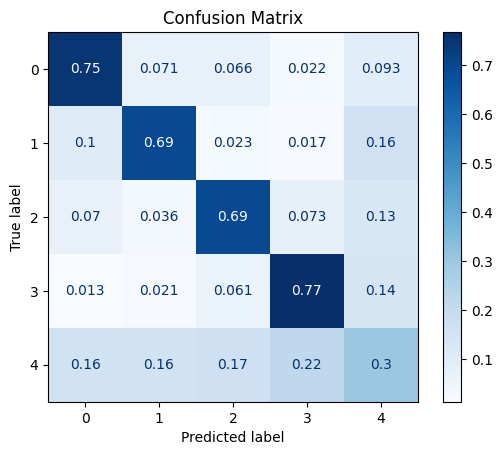

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Assuming 'model' is a Keras model
# Assuming 'true_labels' and 'predicted_labels' are available

# Calculate the confusion matrix

# Normalize each row to convert counts to percentages
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(5, 3))
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [132]:
model.count_params()

1807185

In [134]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 450, 50)           1757900   
                                                                 
 conv1d_11 (Conv1D)          (None, 446, 128)          32128     
                                                                 
 global_max_pooling1d_11 (G  (None, 128)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 5)                 645       
                                                                 
Total params: 1807185 (6.89 MB)
Trainable params: 1807185 (6.89 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [ ]:
# Assuming 'model' is your Keras CNN model
model.save("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/MedicalTextClassification(kernel5).h5")


## LR

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

# Calculate class weights

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(labels_minus_one),
                                        y = labels_minus_one
                                    )
class_weights_dict = dict(enumerate(class_weights))


print(f'class_weights_dict : {class_weights_dict}')


# Define the CNN model
embedding_dim = 50
filters = 128

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=filters, kernel_size=5, activation='relu'))  # Kernel Size
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model with class weights
custom_optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with early stopping and class weights
model.fit(
    padded_train,
    labels_train_one_hot,
    epochs=100,
    batch_size=64,
    validation_data=(padded_test, labels_test_one_hot),
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)

# Evaluate the model on test data
predictions = model.predict(padded_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test_one_hot, axis=1)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

# Assuming 'model' is your Keras CNN model
model.save("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/MedicalTextClassification(LR0.0001).h5")


class_weights_dict : {0: 0.9130434782608695, 1: 1.9330543933054394, 2: 1.5, 3: 0.9463334698893896, 4: 0.600936524453694}
Epoch 1/100
181/181 [==============================] - 39s 210ms/step - loss: 1.6081 - accuracy: 0.2456 - val_loss: 1.6015 - val_accuracy: 0.2874
Epoch 2/100
181/181 [==============================] - 33s 182ms/step - loss: 1.5894 - accuracy: 0.3709 - val_loss: 1.5740 - val_accuracy: 0.3882
Epoch 3/100
181/181 [==============================] - 32s 177ms/step - loss: 1.4984 - accuracy: 0.4887 - val_loss: 1.4170 - val_accuracy: 0.4706
Epoch 4/100
181/181 [==============================] - 33s 181ms/step - loss: 1.2938 - accuracy: 0.5177 - val_loss: 1.2683 - val_accuracy: 0.4726
Epoch 5/100
181/181 [==============================] - 33s 184ms/step - loss: 1.1566 - accuracy: 0.5386 - val_loss: 1.2080 - val_accuracy: 0.4979
Epoch 6/100
181/181 [==============================] - 34s 190ms/step - loss: 1.0483 - accuracy: 0.5720 - val_loss: 1.1463 - val_accuracy: 0.5270
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


F1 Micro Score: 0.5876038781163435


<Figure size 500x300 with 0 Axes>

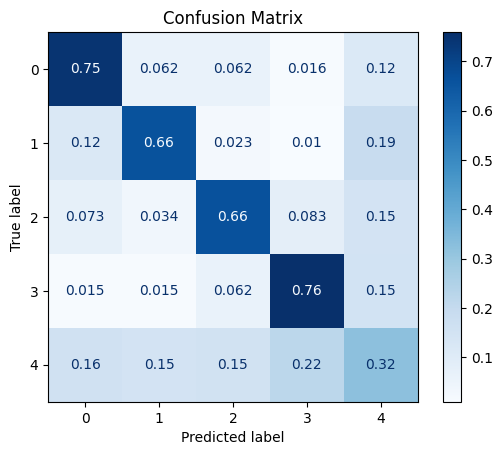

In [ ]:
# F1
from sklearn.metrics import f1_score

# Calculate F1 micro score
f1_micro = f1_score(true_labels, predicted_labels, average='micro')

print("F1 Micro Score:", f1_micro)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Assuming 'model' is a Keras model
# Assuming 'true_labels' and 'predicted_labels' are available

# Calculate the confusion matrix

# Normalize each row to convert counts to percentages
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(5, 3))
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

F1 Micro Score: 0.5876038781163435
91/91 [==============================] - 2s 27ms/step
Confusion Matrix:
[[472  39  39  10  73]
 [ 35 198   7   3  56]
 [ 28  13 256  32  56]
 [  9   9  38 463  91]
 [153 141 148 211 308]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       633
           1       0.49      0.66      0.57       299
           2       0.52      0.66      0.59       385
           3       0.64      0.76      0.70       610
           4       0.53      0.32      0.40       961

    accuracy                           0.59      2888
   macro avg       0.57      0.63      0.59      2888
weighted avg       0.58      0.59      0.57      2888



<Figure size 500x300 with 0 Axes>

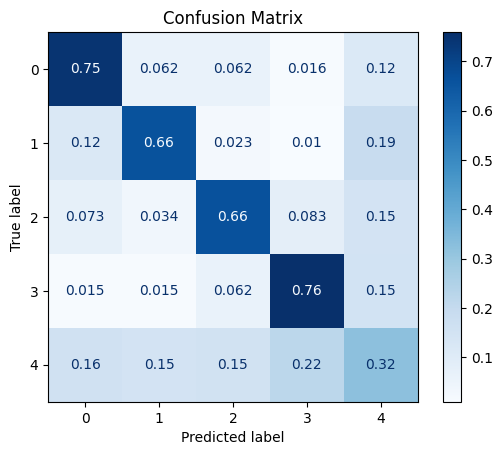

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# loaded_model = load_model("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/MedicalTextClassification(LR0.0001).h5")

# custom_optimizer = Adam(learning_rate=0.00001)
# loaded_model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# loaded_model.fit(
#     padded_train,
#     labels_train_one_hot,
#     epochs=100,
#     batch_size=64,
#     validation_data=(padded_test, labels_test_one_hot),
#     callbacks=[early_stopping],
#     class_weight=class_weights_dict
# )
# F1
from sklearn.metrics import f1_score

# Calculate F1 micro score
f1_micro = f1_score(true_labels, predicted_labels, average='micro')

print("F1 Micro Score:", f1_micro)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Evaluate the model on test data
predictions = model.predict(padded_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test_one_hot, axis=1)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


# Normalize each row to convert counts to percentages
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(5, 3))
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loaded_model.save("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/MedicalTextClassification(LR0.00001).h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


F1 Micro Score: 0.5876038781163435
91/91 [==============================] - 2s 18ms/step
Confusion Matrix:
[[472  39  39  10  73]
 [ 35 198   7   3  56]
 [ 28  13 256  32  56]
 [  9   9  38 463  91]
 [153 141 148 211 308]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       633
           1       0.49      0.66      0.57       299
           2       0.52      0.66      0.59       385
           3       0.64      0.76      0.70       610
           4       0.53      0.32      0.40       961

    accuracy                           0.59      2888
   macro avg       0.57      0.63      0.59      2888
weighted avg       0.58      0.59      0.57      2888



<Figure size 500x300 with 0 Axes>

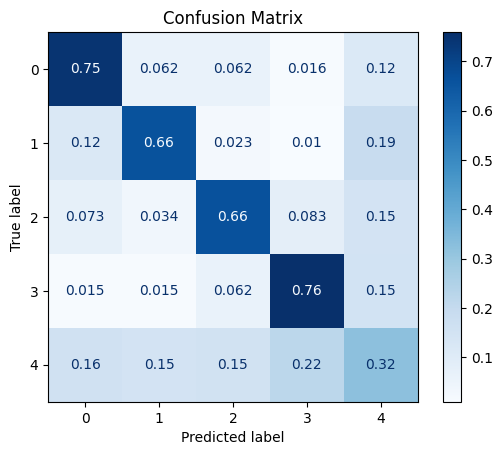

In [ ]:

# # Load the saved model
# loaded_model = load_model("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/MedicalTextClassification(LR0.00001).h5")

# custom_optimizer = Adam(learning_rate=0.000001)
# loaded_model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# loaded_model.fit(
#     padded_train,
#     labels_train_one_hot,
#     epochs=100,
#     batch_size=64,
#     validation_data=(padded_test, labels_test_one_hot),
#     callbacks=[early_stopping],
#     class_weight=class_weights_dict
# )
loaded_model.save("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/MedicalTextClassification(LR0.000001).h5")


# F1
from sklearn.metrics import f1_score

# Calculate F1 micro score
f1_micro = f1_score(true_labels, predicted_labels, average='micro')

print("F1 Micro Score:", f1_micro)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Evaluate the model on test data
predictions = model.predict(padded_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test_one_hot, axis=1)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


# Normalize each row to convert counts to percentages
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(5, 3))
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# F1
from sklearn.metrics import f1_score

# Calculate F1 micro score
f1_micro = f1_score(true_labels, predicted_labels, average='micro')

print("F1 Micro Score:", f1_micro)


In [ ]:

# Evaluate the model on test data
predictions = model.predict(padded_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test_one_hot, axis=1)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Assuming 'model' is a Keras model
# Assuming 'true_labels' and 'predicted_labels' are available

# Calculate the confusion matrix

# Normalize each row to convert counts to percentages
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(5, 3))
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Assuming 'model' is your Keras CNN model
model.save("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/MedicalTextClassification(LR0.00001).h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## augmentation

In [ ]:
!pip install nlpaug

import nlpaug.augmenter.word as naw
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

# Function for text augmentation using synonym replacement
def augment_text(text, aug):
    augmented_text = aug.augment(text)
    return augmented_text

# Augment the training data
aug = naw.SynonymAug(aug_src='wordnet')

augmented_data = [augment_text(text, aug) for text in train_data['medical_abstract']]

# Tokenize and pad augmented data
sequences_augmented = tokenizer.texts_to_sequences(augmented_data)
padded_augmented = pad_sequences(sequences_augmented, maxlen=max_length, padding='post')

# Combine original and augmented data
combined_data = np.vstack([padded_train, padded_augmented])
combined_labels = np.concatenate([labels_train_one_hot, labels_train_one_hot])
flat_combined_labels=[np.where(x==1.)[0][0] for x in combined_labels]
# Calculate class weights

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(flat_combined_labels),
                                        y = flat_combined_labels
                                         )
class_weights_dict = dict(enumerate(class_weights))


print(f'class_weights_dict : {class_weights_dict}')


# Define the CNN model
embedding_dim = 50
filters = 128

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=filters, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model with class weights
custom_optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping and class weights
model.fit(
    combined_data,
    combined_labels,
    epochs=100,
    batch_size=64,
    validation_data=(padded_test, labels_test_one_hot),
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)

# Evaluate the model on test data
predictions = model.predict(padded_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test_one_hot, axis=1)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

# F1
from sklearn.metrics import f1_score

# Calculate F1 micro score
f1_micro = f1_score(true_labels, predicted_labels, average='micro')

print("F1 Micro Score:", f1_micro)


class_weights_dict : {0: 0.9130434782608695, 1: 1.9330543933054394, 2: 1.5, 3: 0.9463334698893896, 4: 1.0}
Epoch 1/100
361/361 [==============================] - 49s 133ms/step - loss: 1.7976 - accuracy: 0.3295 - val_loss: 1.5528 - val_accuracy: 0.3328
Epoch 2/100
361/361 [==============================] - 48s 132ms/step - loss: 1.7741 - accuracy: 0.3364 - val_loss: 1.4700 - val_accuracy: 0.3930
Epoch 3/100
361/361 [==============================] - 46s 128ms/step - loss: 1.6791 - accuracy: 0.4091 - val_loss: 1.2541 - val_accuracy: 0.4962
Epoch 4/100
361/361 [==============================] - 46s 127ms/step - loss: 1.5891 - accuracy: 0.4358 - val_loss: 1.1744 - val_accuracy: 0.5166
Epoch 5/100
361/361 [==============================] - 44s 123ms/step - loss: 1.5173 - accuracy: 0.4696 - val_loss: 1.1071 - val_accuracy: 0.5443
Epoch 6/100
361/361 [==============================] - 45s 125ms/step - loss: 1.4434 - accuracy: 0.4905 - val_loss: 1.0498 - val_accuracy: 0.5762
Epoch 7/100
361/3

## DensePlot

In [ ]:
# Assuming 'model' is your Keras model
# Replace 'model' with your actual variable name

# Extract features from the last layer
last_layer = model.layers[-2]
features = last_layer.output

# Create a new model with the last layer as the output layer
feature_extraction_model = tf.keras.Model(inputs=model.input, outputs=features)

# Get features for a specific dataset (e.g., test data)
features_for_test = feature_extraction_model.predict(padded_test)
features_for_train = feature_extraction_model.predict(padded_train)



361/361 [==============================] - 7s 18ms/step


In [ ]:
feature_extraction_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_input (InputLaye  [(None, 365)]             0         
 r)                                                              
                                                                 
 embedding (Embedding)       (None, 365, 50)           2026750   
                                                                 
 conv1d (Conv1D)             (None, 363, 128)          19328     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
Total params: 2062590 (7.87 MB)
Trainable params: 2062590 (7.

- Activation map

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model

# Assuming 'model' is a Keras model
# 'features_for_test' should be the extracted features from the last layer for the test set

# Function to visualize activation map for a random sample in a specific class
def visualize_activation_map(class_index):
    # Select a random sample from the specified class
    class_samples = features_for_test[true_labels == class_index]
    random_sample = class_samples[np.random.choice(class_samples.shape[0])]

    # Create a model that extracts the output of the last layer
    last_layer = model.layers[-1]
    activation_model = Model(inputs=model.input, outputs=last_layer.output)

    # Get the activation for the random sample
    activation = activation_model.predict(np.expand_dims(random_sample, axis=0))[0]

    # Plot the activation map
    plt.figure(figsize=(8, 3))
    plt.plot(activation, marker='o')
    plt.title(f'Activation Map - Class {class_index}')
    plt.xlabel('Neuron Index')
    plt.ylabel('Activation Value')
    plt.show()

# Visualize activation maps for random samples in different classes
for class_index in range(num_classes):  # Replace 'num_classes' with the actual number of classes
    visualize_activation_map(class_index)


- Test data (sampled)

In [ ]:
!pip install umap-learn


In [ ]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Perform UMAP
umap_model = umap.UMAP()
embedded_features_umap = umap_model.fit_transform(features_for_test)

# subsampled_data = embedded_features_umap[:100]  # Adjust the number based on your preferences
# subsampled_label = labels_minus_one_test[:100]



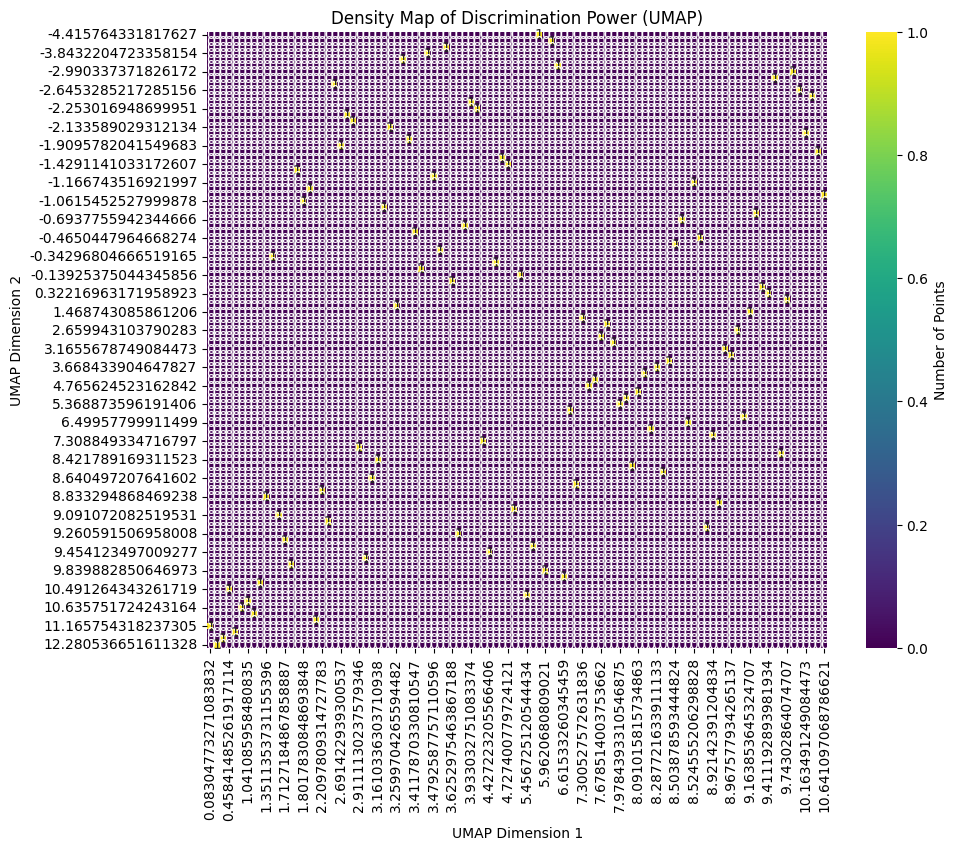

In [ ]:

# # Visualize with seaborn heatmap
# df_umap = pd.DataFrame({'UMAP Dimension 1': subsampled_data[:, 0], 'UMAP Dimension 2': subsampled_data[:, 1], 'Class': subsampled_label})

# plt.figure(figsize=(10, 8))
# heatmap_data_umap = pd.pivot_table(df_umap, values='Class', index='UMAP Dimension 1', columns='UMAP Dimension 2', aggfunc='count', fill_value=0)
# sns.heatmap(heatmap_data_umap, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Points'})
# plt.title("Density Map of Discrimination Power (UMAP)")
# plt.xlabel("UMAP Dimension 1")
# plt.ylabel("UMAP Dimension 2")
# plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Your subsampled data and labels

subsampled_data = embedded_features_umap[:500]  # Adjust the number based on your preferences
subsampled_label = labels_minus_one_test[:500]

# Create a DataFrame with embedded features and true labels
df_umap = pd.DataFrame({'UMAP Dimension 1': subsampled_data[:, 0], 'UMAP Dimension 2': subsampled_data[:, 1], 'Class': subsampled_label})

# Create a custom color palette based on class labels
class_palette = sns.color_palette("hsv", len(np.unique(subsampled_label)))

# Set the style to have a white background
sns.set_style("white")

# Create a heatmap
plt.figure(figsize=(500, 400))
heatmap_data_umap = pd.pivot_table(df_umap, values='Class', index='UMAP Dimension 1', columns='UMAP Dimension 2', aggfunc='count', fill_value=0)
sns.heatmap(heatmap_data_umap, annot=True, fmt='d', cbar_kws={'label': 'Number of Points'}, linewidths=.5, square=True, cbar=True, xticklabels=True, yticklabels=True, annot_kws={'size': 10}, cmap=class_palette)
plt.title("Density Map of Discrimination Power (UMAP)")
plt.xlabel("UMAP Dimension 1", color='black')  # Set the color of the x-axis label
plt.ylabel("UMAP Dimension 2", color='black')  # Set the color of the y-axis label
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np

# Combine embedded features and labels
combined_data = np.column_stack((embedded_features_umap, labels_minus_one_test))

# Shuffle the combined data along the first axis
np.random.shuffle(combined_data)

# Split the shuffled data back into embedded features and labels
shuffled_features_umap = combined_data[:, :-1][:500]
shuffled_labels = combined_data[:, -1][:500]

# Now, you can use shuffled_features_umap and shuffled_labels as your shuffled data

# Your subsampled data and labels
# subsampled_data = embedded_features_umap[:500]
# subsampled_label = labels_minus_one_test[:500]

# Create a DataFrame with embedded features and true labels
df_umap = pd.DataFrame({'UMAP Dimension 1': subsampled_data[:, 0], 'UMAP Dimension 2': subsampled_data[:, 1], 'Class': subsampled_label})

# Create a custom color palette based on class labels
class_palette = sns.color_palette("hsv", len(np.unique(subsampled_label)))

# Set the style to have a white background
sns.set_style("white")

# Create a heatmap
plt.figure(figsize=(100, 80))
heatmap_data_umap = pd.pivot_table(df_umap, values='Class', index='UMAP Dimension 1', columns='UMAP Dimension 2', aggfunc='count', fill_value=0)
ax = sns.heatmap(heatmap_data_umap, annot=True, fmt='d', cbar_kws={'label': 'Number of Points'}, linewidths=.5, square=True, cbar=True, xticklabels=10, yticklabels=10, annot_kws={'size': 10}, cmap=class_palette)
ax.set_xticklabels(np.arange(-10, 30, 10))  # Customize x-axis labels
ax.set_yticklabels(np.arange(-10, 30, 10))  # Customize y-axis labels
plt.title("Density Map of Discrimination Power (UMAP)")
plt.xlabel("UMAP Dimension 1", color='black')  # Set the color of the x-axis label
plt.ylabel("UMAP Dimension 2", color='black')  # Set the color of the y-axis label
plt.show()


In [ ]:
subsampled_label

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Your subsampled data and labels
subsampled_data = embedded_features_umap[:500]
subsampled_label = labels_minus_one_test[:500]

# Create a DataFrame with embedded features and true labels
df_umap = pd.DataFrame({'UMAP Dimension 1': subsampled_data[:, 0], 'UMAP Dimension 2': subsampled_data[:, 1], 'Class': subsampled_label})

# Create a custom color palette based on class labels
class_palette = sns.color_palette("hsv", len(np.unique(subsampled_label)))

# Set the style to have a white background
sns.set_style("white")

# Create a scatterplot
plt.figure(figsize=(12, 10))
scatterplot = sns.scatterplot(data=df_umap, x='UMAP Dimension 1', y='UMAP Dimension 2', hue='Class', palette=class_palette, s=20)
scatterplot.set_title("Scatterplot of Discrimination Power (UMAP)")
plt.show()


# RNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Define the RNN model
embedding_dim = 50
units_lstm = 128

rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
rnn_model.add(LSTM(units=units_lstm, activation='tanh'))
rnn_model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
custom_optimizer = Adam(learning_rate=0.0001)
rnn_model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
rnn_model.fit(
    padded_train,
    labels_train_one_hot,
    epochs=100,
    batch_size=64,
    validation_data=(padded_test, labels_test_one_hot),
    callbacks=[early_stopping]
)

# Evaluate the model on test data
rnn_predictions = rnn_model.predict(padded_test)
rnn_predicted_labels = np.argmax(rnn_predictions, axis=1)
rnn_true_labels = np.argmax(labels_test_one_hot, axis=1)

# Print confusion matrix and classification report for RNN
rnn_conf_matrix = confusion_matrix(rnn_true_labels, rnn_predicted_labels)
rnn_class_report = classification_report(rnn_true_labels, rnn_predicted_labels)

print("RNN Confusion Matrix:")
print(rnn_conf_matrix)

print("\nRNN Classification Report:")
print(rnn_class_report)


Epoch 1/100
181/181 [==============================] - 158s 856ms/step - loss: 1.5509 - accuracy: 0.3273 - val_loss: 1.5312 - val_accuracy: 0.3328
Epoch 2/100
181/181 [==============================] - 172s 952ms/step - loss: 1.5319 - accuracy: 0.3328 - val_loss: 1.5318 - val_accuracy: 0.3328
Epoch 3/100
181/181 [==============================] - 150s 828ms/step - loss: 1.5321 - accuracy: 0.3328 - val_loss: 1.5310 - val_accuracy: 0.3328
Epoch 4/100
181/181 [==============================] - 160s 886ms/step - loss: 1.5314 - accuracy: 0.3328 - val_loss: 1.5316 - val_accuracy: 0.3328
Epoch 5/100
181/181 [==============================] - 150s 828ms/step - loss: 1.5316 - accuracy: 0.3328 - val_loss: 1.5307 - val_accuracy: 0.3328
Epoch 6/100
181/181 [==============================] - 161s 890ms/step - loss: 1.5315 - accuracy: 0.3328 - val_loss: 1.5307 - val_accuracy: 0.3328
Epoch 7/100
181/181 [==============================] - 161s 892ms/step - loss: 1.5318 - accuracy: 0.3328 - val_loss: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# improved CNN


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Define the CNN model with suggested improvements
embedding_dim = 50  # Adjusted embedding dimension
filters = 128
kernel_size = 3  # Adjusted kernel size
units_dense = 64  # Adjusted dense layer units
dropout_rate = 0.5  # Added dropout layer with a dropout rate
learning_rate = 0.0001  # Adjusted learning rate

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
cnn_model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
cnn_model.add(BatchNormalization())  # Added Batch Normalization
cnn_model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(units=units_dense, activation='relu'))
cnn_model.add(Dropout(dropout_rate))  # Added Dropout layer
cnn_model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
custom_optimizer = Adam(learning_rate=learning_rate)
cnn_model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
cnn_model.fit(
    padded_train,
    labels_train_one_hot,
    epochs=100,
    batch_size=64,
    validation_data=(padded_test, labels_test_one_hot),
    callbacks=[early_stopping]
)

# Evaluate the model on test data
cnn_predictions = cnn_model.predict(padded_test)
cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)
cnn_true_labels = np.argmax(labels_test_one_hot, axis=1)

# Print confusion matrix and classification report for CNN
cnn_conf_matrix = confusion_matrix(cnn_true_labels, cnn_predicted_labels)
cnn_class_report = classification_report(cnn_true_labels, cnn_predicted_labels)

print("CNN Confusion Matrix:")
print(cnn_conf_matrix)

print("\nCNN Classification Report:")
print(cnn_class_report)


Epoch 1/100
181/181 [==============================] - 58s 315ms/step - loss: 1.6122 - accuracy: 0.2865 - val_loss: 1.5969 - val_accuracy: 0.3334
Epoch 2/100
181/181 [==============================] - 56s 307ms/step - loss: 1.4922 - accuracy: 0.3478 - val_loss: 1.5716 - val_accuracy: 0.3366
Epoch 3/100
181/181 [==============================] - 58s 321ms/step - loss: 1.3919 - accuracy: 0.4175 - val_loss: 1.4936 - val_accuracy: 0.4103
Epoch 4/100
181/181 [==============================] - 57s 316ms/step - loss: 1.2529 - accuracy: 0.5040 - val_loss: 1.3488 - val_accuracy: 0.4643
Epoch 5/100
181/181 [==============================] - 57s 313ms/step - loss: 1.1187 - accuracy: 0.5664 - val_loss: 1.2816 - val_accuracy: 0.4616
Epoch 6/100
181/181 [==============================] - 57s 316ms/step - loss: 1.0146 - accuracy: 0.6210 - val_loss: 1.2607 - val_accuracy: 0.4536
Epoch 7/100
181/181 [==============================] - 55s 306ms/step - loss: 0.9320 - accuracy: 0.6501 - val_loss: 1.2561 -

#ML

In [ ]:
# prompt:

#%% Imports
import pandas as pd

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.cluster import DBSCAN, KMeans
from sklearn.svm import OneClassSVM
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, IsolationForest, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier, Perceptron, Lasso, HuberRegressor, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN, KMeans
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import numpy as np
#%% Preprocessing
nltk.data.path.append(r"D:/Medical-Abstracts-TC-Corpus-main")  # Use raw string or double backslashes

# Load your data from CSV file
file_path ="/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_train.csv"
train_data = pd.read_csv(file_path)

test_file_path ="/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_test.csv"
test_data = pd.read_csv(test_file_path)


# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Reassemble the processed text
    processed_text = ' '.join(tokens)

    return processed_text

# Apply preprocessing to the 'text' column
train_data['medical_abstract'] = train_data['medical_abstract'].apply(preprocess_text)
test_data['medical_abstract'] = train_data['medical_abstract'].apply(preprocess_text)


# Encode labels
label_encoder = LabelEncoder()
train_data['condition_label'] = label_encoder.fit_transform(train_data['condition_label'])
test_data['condition_label'] = label_encoder.fit_transform(test_data['condition_label'])

#%% train model

# Build a classification pipeline with TF-IDF vectorizer and ML classifier
classifier = make_pipeline(TfidfVectorizer(stop_words='english'), RandomForestClassifier())

# Train the classifier
classifier.fit(train_data['medical_abstract'], train_data['condition_label'])
#%% test
# Make predictions on the test set
predictions = classifier.predict(test_data['medical_abstract'].apply(preprocess_text))

true_labels = test_data['condition_label'].values

# Evaluate the performance
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(true_labels, predictions))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.24
              precision    recall  f1-score   support

           0       0.22      0.25      0.24       633
           1       0.10      0.09      0.09       299
           2       0.15      0.11      0.13       385
           3       0.20      0.21      0.20       610
           4       0.35      0.35      0.35       961

    accuracy                           0.24      2888
   macro avg       0.20      0.20      0.20      2888
weighted avg       0.23      0.24      0.24      2888



# BERT

In [51]:
import pandas as pd

In [52]:
!pip install tensorflow_text
!pip install tensorflow_hub
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
df = pd.read_csv("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_train.csv")
df.head(5)

,condition_label,medical_abstract
0,5,Tissue changes around loose prostheses. A cani...
1,1,Neuropeptide Y and neuron-specific enolase lev...
2,2,"Sexually transmitted diseases of the colon, re..."
3,1,Lipolytic factors associated with murine and h...
4,3,Does carotid restenosis predict an increased r...


In [53]:
df.groupby('condition_label').describe()

medical_abstract         \
                           count unique   
condition_label                           
1                           2530   2530   
2                           1195   1195   
3                           1540   1540   
4                           2441   2441   
5                           3844   3844   

                                                                         
                                                               top freq  
condition_label                                                          
1                Neuropeptide Y and neuron-specific enolase lev...    1  
2                Sexually transmitted diseases of the colon, re...    1  
3                Does carotid restenosis predict an increased r...    1  
4                Pharmacomechanical thrombolysis and angioplast...    1  
5                Tissue changes around loose prostheses. A cani...    1

In [54]:
df_test=pd.read_csv("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_test.csv")

In [55]:
df_test.groupby('condition_label').describe()

medical_abstract         \
                           count unique   
condition_label                           
1                            633    633   
2                            299    299   
3                            385    385   
4                            610    610   
5                            961    961   

                                                                         
                                                               top freq  
condition_label                                                          
1                Flow cytometric DNA analysis of parathyroid tu...    1  
2                Current status of duplex Doppler ultrasound in...    1  
3                Obstructive sleep apnea following topical orop...    1  
4                Paraneoplastic vasculitic neuropathy: a treata...    1  
5                Neutrophil function and pyogenic infections in...    1

In [56]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [57]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']


- getting sample sentence embedding

In [58]:
len(get_sentence_embeding([df['medical_abstract'][900]])[0])

768

- Build BERT Model

In [59]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(128, activation='relu')(outputs['pooled_output'])
l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)


# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [60]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                              

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# METRICS = [
#       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
#       tf.keras.metrics.Precision(name='precision'),
#       tf.keras.metrics.Recall(name='recall')
# ]
custom_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer=custom_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
y_train=df['condition_label'].values-1

In [63]:
X_train=df['medical_abstract'].values

In [64]:
y_test=df_test['condition_label'].values-1

In [65]:
X_test=df_test['medical_abstract'].values

In [66]:
from keras.utils import to_categorical
import numpy as np
y_test_one_hot = to_categorical(y_test)
y_train_one_hot = to_categorical(y_train)


In [67]:
y_test_one_hot

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(df['condition_label'].values-1),
                                        y = df['condition_label'].values-1
                                    )
class_weights_dict = dict(enumerate(class_weights))


print(f'class_weights_dict : {class_weights_dict}')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping and class weights
model.fit(
    X_train,
    y_train_one_hot,
    epochs=100,
    batch_size=64,
    validation_data=(X_test,
    y_test_one_hot),
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)


class_weights_dict : {0: 0.9130434782608695, 1: 1.9330543933054394, 2: 1.5, 3: 0.9463334698893896, 4: 0.600936524453694}
Epoch 1/100
181/181 [==============================] - 195s 1s/step - loss: 1.6197 - accuracy: 0.2431 - val_loss: 1.5823 - val_accuracy: 0.2684
Epoch 2/100
181/181 [==============================] - 176s 975ms/step - loss: 1.5446 - accuracy: 0.2992 - val_loss: 1.4746 - val_accuracy: 0.3269
Epoch 3/100
181/181 [==============================] - 177s 976ms/step - loss: 1.5007 - accuracy: 0.3293 - val_loss: 1.4431 - val_accuracy: 0.3847
Epoch 4/100
181/181 [==============================] - 177s 980ms/step - loss: 1.4775 - accuracy: 0.3401 - val_loss: 1.4189 - val_accuracy: 0.3940
Epoch 5/100
181/181 [==============================] - 168s 929ms/step - loss: 1.4402 - accuracy: 0.3623 - val_loss: 1.4651 - val_accuracy: 0.3258
Epoch 6/100
181/181 [==============================] - 169s 936ms/step - loss: 1.4287 - accuracy: 0.3695 - val_loss: 1.4237 - val_accuracy: 0.3951


KeyboardInterrupt: 

In [ ]:

model.save("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/MedicalTextClassificationBERT.h5")


In [ ]:
# Evaluate the model on test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)ل

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)



In [ ]:

# F1
from sklearn.metrics import f1_score

# Calculate F1 micro score
f1_micro = f1_score(true_labels, predicted_labels, average='micro')

print("F1 Micro Score:", f1_micro)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Assuming 'model' is a Keras model
# Assuming 'true_labels' and 'predicted_labels' are available

# Calculate the confusion matrix

# Normalize each row to convert counts to percentages
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(5, 3))
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Transformer

In [ ]:
import pandas as pd
file_path ="/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_train.csv"
train_data = pd.read_csv(file_path)

test_file_path ="/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_test.csv"
test_data = pd.read_csv(test_file_path)


In [ ]:
s=train_data['medical_abstract'][8]
s

'Color Doppler diagnosis of mechanical prosthetic mitral regurgitation: usefulness of the flow convergence region proximal to the regurgitant orifice. In prosthetic or paravalvular prosthetic mitral regurgitation, transthoracic color Doppler flow mapping can sometimes fail to detect the regurgitant jet within the left atrium because of the shadowing by the prosthetic valve. To overcome this limitation, we assessed the utility of color Doppler visualization of the flow convergence region (FCR) proximal to the regurgitant orifice in 20 consecutive patients with mechanical prosthetic mitral regurgitation documented by surgery and cardiac catheterization (13 of 20 patients). In addition, we studied 33 patients with normally functioning mitral prostheses. Doppler studies were performed in the apical, subcostal, and parasternal long-axis views. An FCR was detected in 95% (19 of 20) of patients with prosthetic mitral regurgitation. A jet area in the left atrium was detected in 60% (12 of 20) 

In [ ]:
sl=train_data['condition_label'][8]
sl

5

In [ ]:
tain_data=train_data['medical_abstract'].values
tain_label=train_data['condition_label'].values

In [ ]:
l=train_data['condition_label'].unique()
l

array([5, 1, 2, 3, 4])

In [ ]:
import numpy as np
file_path =("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_labels.csv")
labels = pd.read_csv(file_path)
labels

,condition_label,condition_name
0,1,neoplasms
1,2,digestive system diseases
2,3,nervous system diseases
3,4,cardiovascular diseases
4,5,general pathological conditions


In [ ]:
from transformers import pipeline

classifier = pipeline('zero-shot-classification')
classifier(s, l)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'Color Doppler diagnosis of mechanical prosthetic mitral regurgitation: usefulness of the flow convergence region proximal to the regurgitant orifice. In prosthetic or paravalvular prosthetic mitral regurgitation, transthoracic color Doppler flow mapping can sometimes fail to detect the regurgitant jet within the left atrium because of the shadowing by the prosthetic valve. To overcome this limitation, we assessed the utility of color Doppler visualization of the flow convergence region (FCR) proximal to the regurgitant orifice in 20 consecutive patients with mechanical prosthetic mitral regurgitation documented by surgery and cardiac catheterization (13 of 20 patients). In addition, we studied 33 patients with normally functioning mitral prostheses. Doppler studies were performed in the apical, subcostal, and parasternal long-axis views. An FCR was detected in 95% (19 of 20) of patients with prosthetic mitral regurgitation. A jet area in the left atrium was detected in 60

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="tarasophia/Bio_ClinicalBERT_medical")

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("tarasophia/Bio_ClinicalBERT_medical")
model = AutoModelForSequenceClassification.from_pretrained("tarasophia/Bio_ClinicalBERT_medical")

In [ ]:
tokenizer(s)['input_ids']

In [ ]:
pipe(s,)

Ignoring args : (array([5, 1, 2, 3, 4]),)


[{'label': 'LABEL_1', 'score': 0.7712513208389282}]

In [ ]:
!pip install sagemaker --upgrade
# !pip install boto3



In [ ]:
import sagemaker
import boto3
from sagemaker.huggingface import HuggingFace

try:
	role = sagemaker.get_execution_role()
except ValueError:
	iam = boto3.client('iam')
	role = iam.get_role(RoleName='sagemaker_execution_role')['Role']['Arn']

hyperparameters = {
	'model_name_or_path':'sid321axn/Bio_ClinicalBERT-finetuned-medicalcondition',
	'output_dir':'/opt/ml/model'
	# add your remaining hyperparameters
	# more info here https://github.com/huggingface/transformers/tree/v4.26.0/examples/pytorch/text-classification
}

# git configuration to download our fine-tuning script
git_config = {'repo': 'https://github.com/huggingface/transformers.git','branch': 'v4.26.0'}

# # creates Hugging Face estimator
# huggingface_estimator = HuggingFace(
# 	entry_point='run_glue.py',
#  train_data=train_data,
# 	instance_type='ml.p3.2xlarge',
# 	instance_count=1,
# 	role=role,
# 	git_config=git_config,
# 	transformers_version='4.26.0',
# 	pytorch_version='1.13.1',
# 	py_version='py39',
# 	hyperparameters = hyperparameters
# )

# # starting the train job
# huggingface_estimator.fit()

# Bio_ClinicalBERT_medical

In [ ]:
import pandas as pd
file_path ="/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_train.csv"
train_data = pd.read_csv(file_path)

test_file_path ="/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_test.csv"
test_data = pd.read_csv(test_file_path)


In [ ]:
import numpy as np
import pandas as pd
file_path =("/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main/medical_tc_labels.csv")
labels = pd.read_csv(file_path)['condition_name'].values
labels

array(['neoplasms', 'digestive system diseases',
       'nervous system diseases', 'cardiovascular diseases',
       'general pathological conditions'], dtype=object)

In [ ]:
train_data['medical_abstract'][80]

'Effect of microwave and ionizing radiation in patients with recurrent laryngeal carcinoma. This study describes the treatment and survival of 54 patients with gross recurrent laryngeal carcinoma after radiotherapy. Twenty-six patients were treated with local ultra-high frequency hyperthermia in combination with radiotherapy and chemotherapy (HRCH). Twenty-eight control patients were treated with radiotherapy and chemotherapy (RCh). Eight patients (33 per cent) in HRCh showed a three year survival but no patient in the RCh group. At two years 18 patients (75 per cent) in HRCh and two (7 per cent) in RCh survived. '

In [ ]:
train_data['condition_label'].values

array([5, 1, 2, ..., 5, 3, 5])

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("text-classification", model="tarasophia/Bio_ClinicalBERT_medical")

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification,AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("tarasophia/Bio_ClinicalBERT_medical")
model = AutoModelForTokenClassification.from_pretrained("tarasophia/Bio_ClinicalBERT_medical",  num_labels=5, ignore_mismatched_sizes=True)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at tarasophia/Bio_ClinicalBERT_medical and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([16, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([16]) in the checkpoint and torch.Size([5]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
test_data['medical_abstract'].values

In [ ]:
test_sentenses=[s for s in test_data['medical_abstract'].values[0:10]]

In [ ]:
len(test_sentenses)

10

In [ ]:
inputs = tokenizer(test_sentenses,  padding=True, truncation=True, return_tensors="pt")

In [ ]:
preprocessed_test_data=inputs

In [ ]:
preprocessed_test_data

{'input_ids': tensor([[  101,   184,  4832,  ...,     0,     0,     0],
        [  101, 24928,  3818,  ...,     0,     0,     0],
        [  101,   170,  4065,  ...,     0,     0,     0],
        ...,
        [  101, 23589,  1648,  ...,     0,     0,     0],
        [  101,  1231, 10704,  ...,  1292,  2686,   102],
        [  101,  1954,  2781,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
results=model(**preprocessed_test_data)

In [ ]:
results

In [ ]:
results

In [ ]:
import torch

predictions = torch.nn.functional.softmax(results.logits, dim=-1)
print(predictions)

In [ ]:
model.config.id2label

{0: 'LABEL_0',
 1: 'LABEL_1',
 2: 'LABEL_2',
 3: 'LABEL_3',
 4: 'LABEL_4',
 5: 'LABEL_5',
 6: 'LABEL_6',
 7: 'LABEL_7',
 8: 'LABEL_8',
 9: 'LABEL_9',
 10: 'LABEL_10',
 11: 'LABEL_11',
 12: 'LABEL_12',
 13: 'LABEL_13',
 14: 'LABEL_14',
 15: 'LABEL_15'}

In [ ]:
predictions.detach().numpy()

array([[0.09019391, 0.10523727, 0.10878167, 0.09690937, 0.07425757,
        0.01335635, 0.03612795, 0.01256179, 0.02156424, 0.08279051,
        0.06852957, 0.08907384, 0.07593466, 0.04693564, 0.04115604,
        0.03658965],
       [0.08879813, 0.11653195, 0.11090408, 0.09457479, 0.06945771,
        0.01214695, 0.0391111 , 0.0114571 , 0.02010307, 0.0832087 ,
        0.06644388, 0.09547975, 0.0746851 , 0.04758963, 0.03735959,
        0.03214851],
       [0.09548549, 0.11467446, 0.10109651, 0.10201746, 0.06530246,
        0.01361883, 0.04376252, 0.01061757, 0.0222088 , 0.08356179,
        0.06131408, 0.09239015, 0.0753183 , 0.04635582, 0.03928238,
        0.03299337],
       [0.08918025, 0.12184735, 0.12044288, 0.10444383, 0.06708924,
        0.01249295, 0.04439448, 0.00992493, 0.01897862, 0.08578528,
        0.06900271, 0.08186933, 0.06844249, 0.04232363, 0.03411147,
        0.02967055],
       [0.0861362 , 0.11472441, 0.10612073, 0.11658066, 0.06710824,
        0.01471345, 0.04411362, 

In [ ]:
[np.argmax(p) for p in predictions.detach().numpy()]

[2, 1, 1, 1, 3, 1, 1, 1, 2, 2]

In [ ]:
!pip install accelerate -U

In [ ]:
!pip install transformers[torch]

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="/content/drive/MyDrive/Medical-Abstracts-TC-Corpus-main")

ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.20.1`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [ ]:

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


NameError: name 'confusion_matrix' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(5, 3))
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()